The following are the features we'll use to predict our target variable (heart disease or no heart disease).
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type 0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical
angina: chest pain not related to heart 2: Non-anginal pain: typically esophageal spasms (non heart
related) 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is
typically cause for concern
5. chol - serum cholestoral in mg/dl serum = LDL + HDL + .2 * triglycerides above 200 is cause for
concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) *'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results 0: Nothing to note 1: ST-T Wave abnormality can range
from mild symptoms to severe problems signals non-normal heart beat 2: Possible or definite left
ventricular hypertrophy Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise
unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment 0: Upsloping: better heart rate with excercise
(uncommon) 1: Flatsloping: minimal change (typical healthy heart) 2: Downslopins: signs of unhealthy
heart
12. ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the
blood passing through the more blood movement the better (no clots)
13. thal - thalium stress result 1,3: normal 6: fixed defect: used to be defect but ok now 7: reversable defect:
no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute) Note: No personal identifiable
information (PPI) can be found in the dataset.

In [2]:
pip install Scikit-learn



                                              0.0/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB 1.1 MB/s eta 0:00:08
                                              0.2/8.3 MB 1.7 MB/s eta 0:00:05
     -                                        0.3/8.3 MB 2.1 MB/s eta 0:00:04
     --                                       0.4/8.3 MB 2.2 MB/s eta 0:00:04
     ---                                      0.8/8.3 MB 3.2 MB/s eta 0:00:03
     ------                                   1.3/8.3 MB 4.2 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 5.1 MB/s eta 0:00:02
     -----------                              2.4/8.3 MB 5.8 MB/s eta 0:00:02
     --------------                           2.9/8.3 MB 6.6 MB/s eta 0:00:01
     ----------------                         3.4/8.3 MB 7.0 MB/s eta 0:00:01
     -------------------                      4.0/8.3 MB 7.2 MB/s eta 0:00:01
     ---------------------                    4.5/8.3 MB 7.8 MB/s eta 

In [3]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
%matplotlib inline
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [10]:
df = pd.read_csv("heart.csv")
df.shape
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

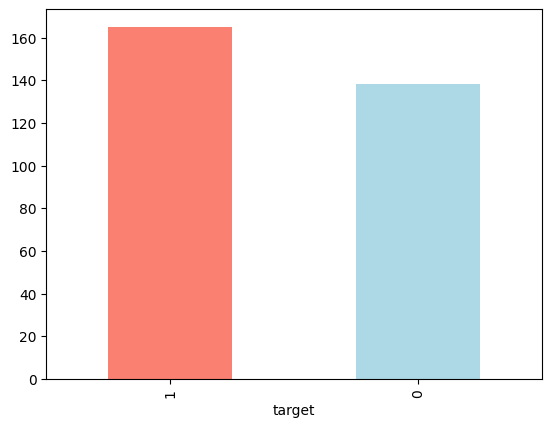

In [15]:
df['target'].value_counts().plot(kind = "bar",color=["salmon",'lightblue'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isna().sum() // any missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequency according to the sex

In [20]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [22]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

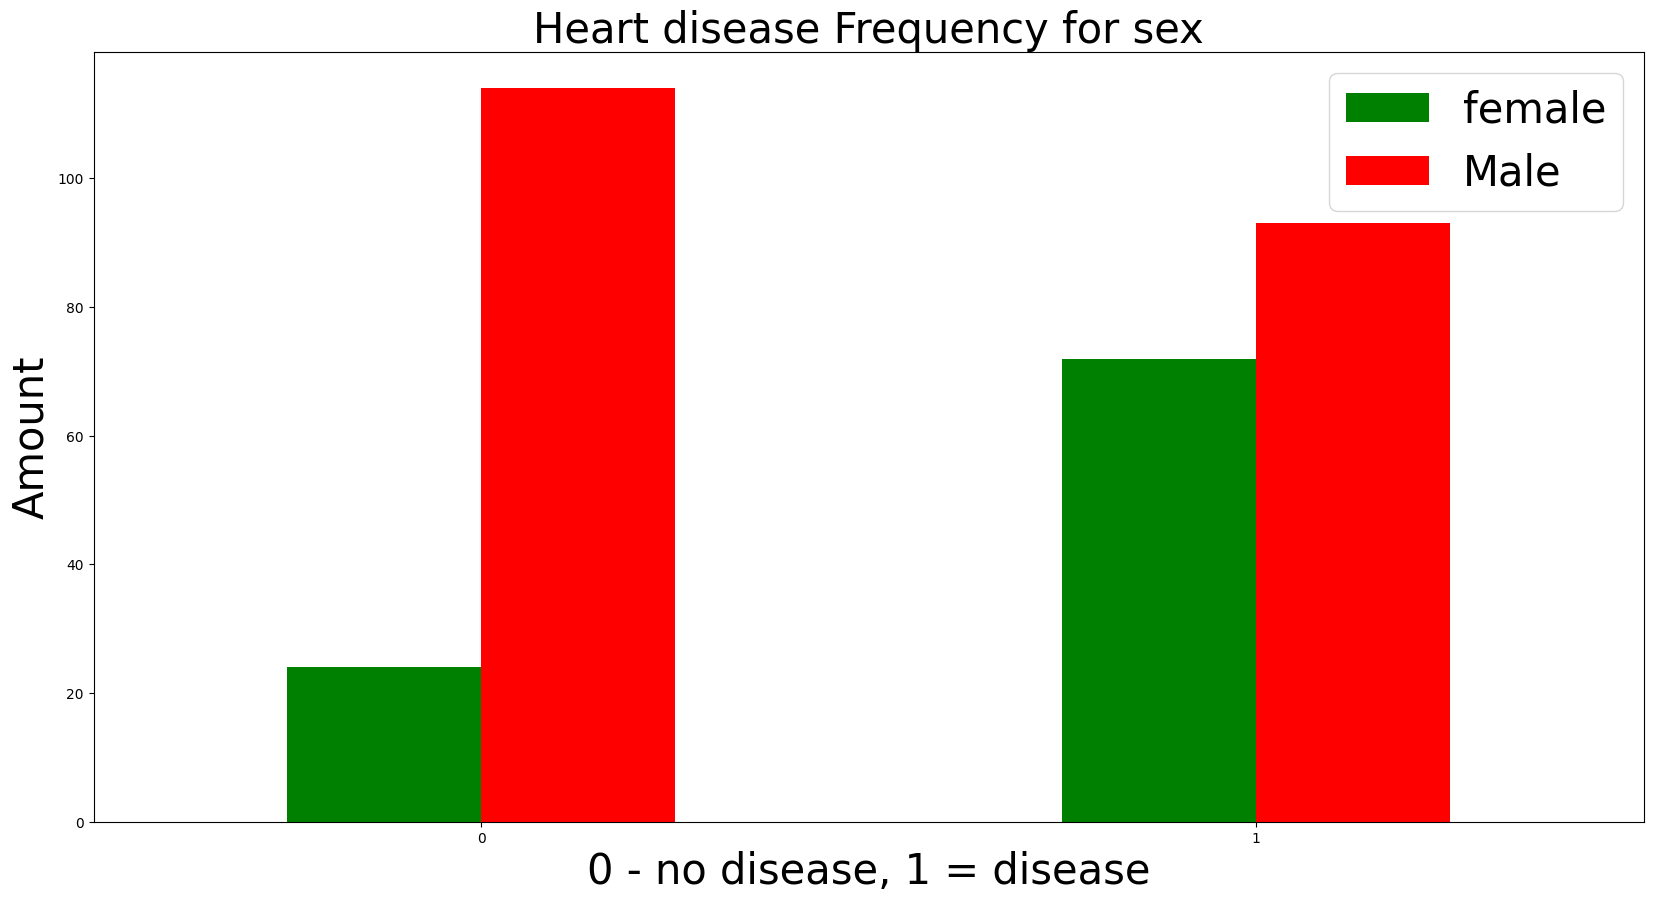

In [27]:
# plot a graph for the crosstab

pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(20,10),color=["green","red"])

plt.title("Heart disease Frequency for sex",fontsize =30)
plt.xlabel("0 - no disease, 1 = disease",fontsize =30)
plt.ylabel("Amount",fontsize =30)
plt.legend(["female",'Male'],fontsize =30)
plt.xticks(rotation=0)

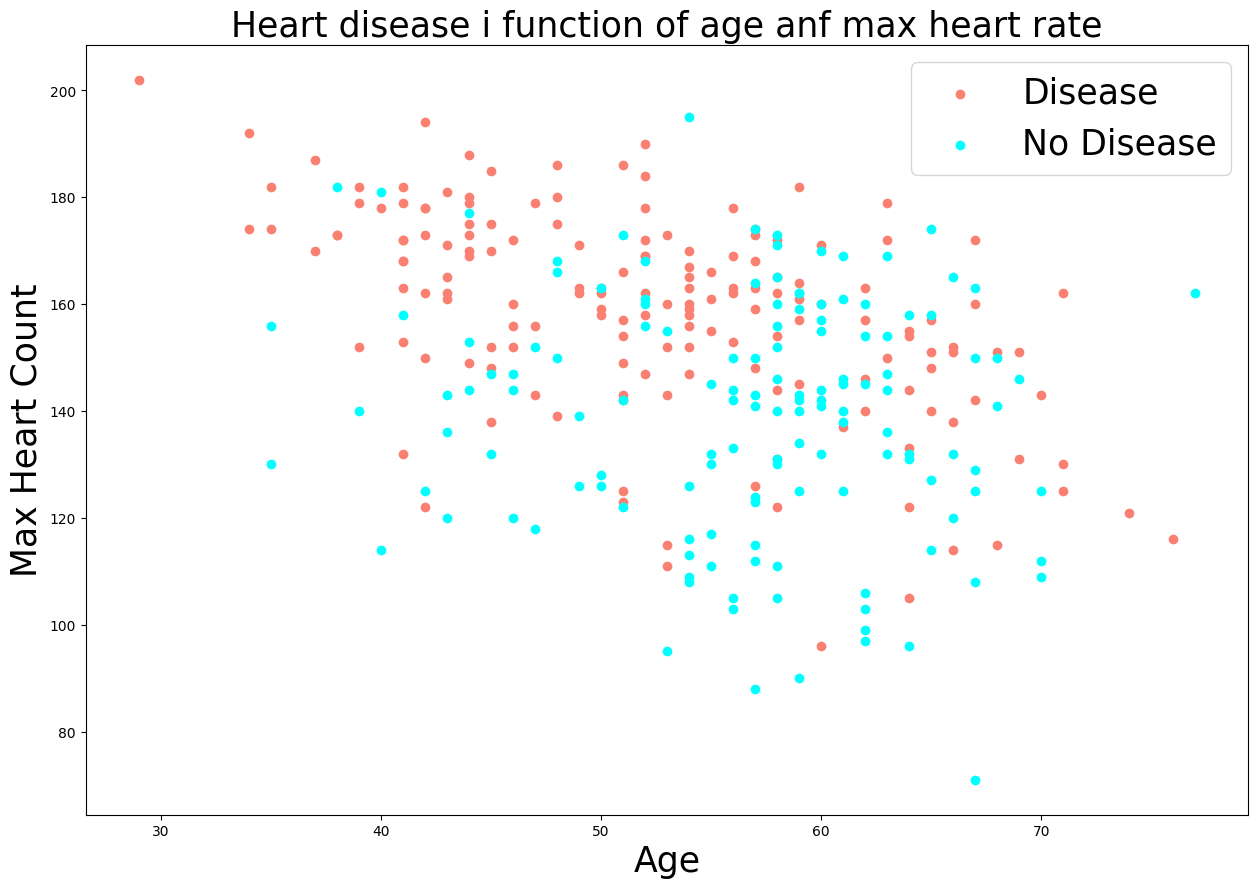

In [31]:
plt.figure(figsize = (15,10))

# scatter plot with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "salmon")

# scatter plot with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           color = "cyan")

plt.title("Heart disease i function of age anf max heart rate",fontsize = 25)
plt.xlabel("Age",fontsize = 25)
plt.ylabel("Max Heart Count",fontsize = 25)
plt.legend(["Disease","No Disease"],fontsize = 25)

## Heart disease frequency  per chest pain
    cp = chest pain type
    0 : typical angina : chest pain related decrease in blood supply to the heart
    1 : Atypical angina : chest pain not related to heart
    2 : Non anginal pain : typically esophagas spasms
    3 : Asymptomatic : chest pain not showing signs of disease

In [33]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: ylabel='Frequency'>

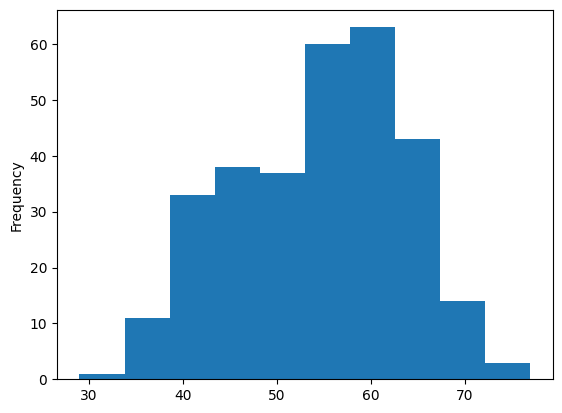

In [35]:
df.age.plot.hist()

C:\Users\om prakash\AppData\Local\Temp\ipykernel_14664\2219997135.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Disease","No Disease")


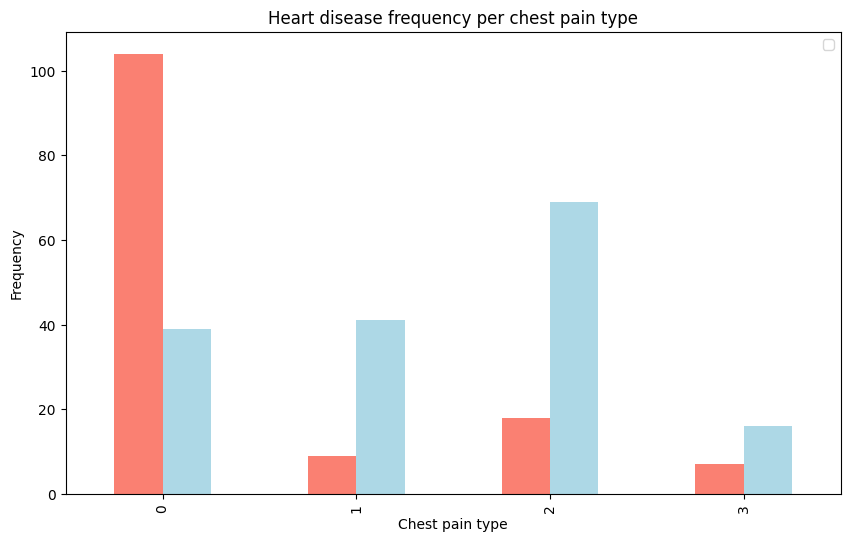

In [39]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize = (10,6),color = ["salmon",'lightblue'])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend("Disease","No Disease")

In [40]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

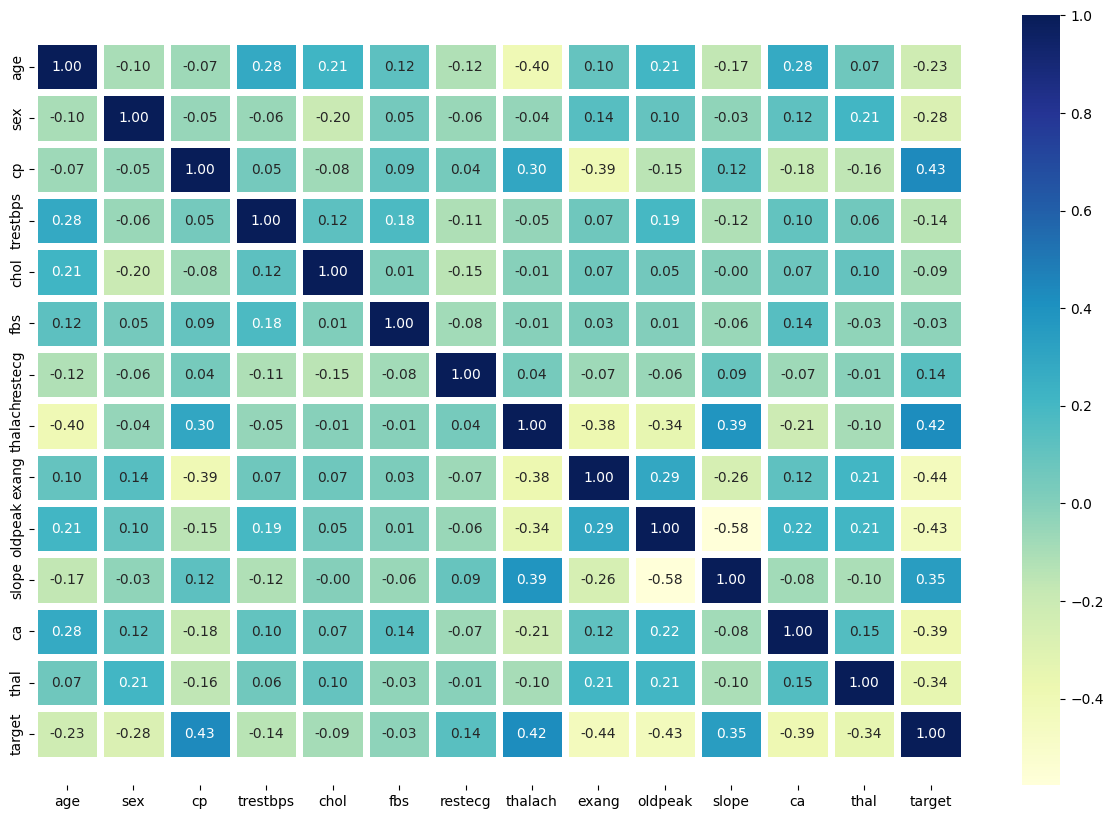

In [46]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,annot=True,
                   linewidths=5,
                   fmt=".2f",
                    cmap = "YlGnBu")

bottom ,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

## Build a model

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
# Split the data into x and y
X = df.drop("target",axis = 1)
Y = df["target"]

In [52]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [54]:
#  Now split the data into train and test sets

np.random.seed(42)

# split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [55]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [56]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


# Now try 3 different machine learning models:
1 - Logistic Regression
2 - K-Nearest neighbors Classifier
3 - RAndom Forest Classsifier

In [58]:
# put the data in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
           "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}


def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    
#     make a dictionary to keep the model score
    model_scores ={}
    
    for name,model in models.items():
#         fit the model to the data
        model.fit(X_train,Y_train)
        
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            Y_train = Y_train,
                            Y_test  = Y_test)

model_scores

C:\Users\om prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

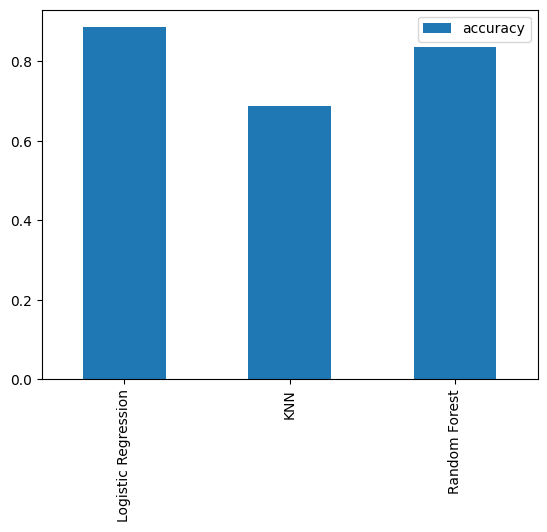

In [59]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

### save the models for the future use

In [60]:
import  pickle

In [61]:
with open("model_pickle","wb") as file:
    pickle.dump(models,file)